# **Imports**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import download
from wordcloud import WordCloud

In [3]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# **Load Data**

In [4]:
path = '/content/drive/MyDrive/Colab Notebooks/amazon'
data_path = '/content/drive/MyDrive/Colab Notebooks/amazon/FshionProductReviews_V3.csv'

In [5]:
data = pd.read_csv(data_path)
data.head(10)

,overall,verified,reviewTime,reviewText,summary,length
0,2,True,2014-09-28,"I agree with the other review, the opening is ...","I agree with the other review, the opening is ...",48
1,2,True,2014-08-24,too tiny an opening,Two Stars,4
2,4,True,2014-05-31,These little plastic backs work great. No mor...,Works great!,28
3,3,True,2013-09-22,mother - in - law wanted it as a present for h...,bought as a present,21
4,3,True,2013-07-17,"Item is of good quality. Looks great, too. But...",Buxton heiress collection,68
5,4,True,2013-03-09,This brand has been around a long time and you...,BUXTON QUALITY!,26
6,2,True,2013-01-27,I smoke 100's and these are NOT made for them....,Buxton Heiress Collection Black Leather Cigare...,26
7,1,True,2013-01-04,"cheap and cheesy, but i guess i could have exp...",inexpensive case,20
8,1,True,2012-07-30,"I ordered a ladies cigarette case for my wife,...",i was ripped off!!!!,58
9,3,True,2017-10-31,Love it but it tore up shortly after I got it....,Love it but it tore up shortly after I got ...,31


In [6]:
data.shape

(658184, 6)

# **Text Cleaning**

In [7]:
# converting to lower case
data['reviewText'] = data.reviewText.str.lower()
data.reviewText

0         i agree with the other review, the opening is ...
1                                       too tiny an opening
2         these little plastic backs work great.  no mor...
3         mother - in - law wanted it as a present for h...
4         item is of good quality. looks great, too. but...
                                ...                        
658179    i absolutely love this dress!!  it's sexy and ...
658180    i'm 5'6 175lbs. i'm on the tall side. i wear a...
658181                           too big in the chest area!
658182                  too clear in the back, needs lining
658183    ordered and was slightly small. worked with th...
Name: reviewText, Length: 658184, dtype: object

In [47]:
# Removing Punctuation
data['reviewText'] = data.reviewText.str.replace('[^\w\s]','')
data.reviewText

<ipython-input-47-e374a3fb5b0e>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['reviewText'] = data.reviewText.str.replace('[^\w\s]','')


0         agree  opening small  bent hook expensive earr...
1                                              tiny opening
2         little plastic back work great  loosing  hook ...
3               mother   law wanted present sister  d work 
4            look     s  stretched  carefully push case ...
                                ...                        
658179    absolutely love   s sexy comfortable  split mu...
658180    m  lb  m tall  large large comfortable amount ...
658181                                      big chest area 
658182                                   clear  need lining
658183    slightly   worked company graciously sending b...
Name: reviewText, Length: 658184, dtype: object

In [9]:
# REmoving non character
data['reviewText'] = data.reviewText.str.replace('\d+','')
data.reviewText


<ipython-input-9-bcd87efbb0db>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['reviewText'] = data.reviewText.str.replace('\d+','')


0         i agree with the other review, the opening is ...
1                                       too tiny an opening
2         these little plastic backs work great.  no mor...
3         mother - in - law wanted it as a present for h...
4         item is of good quality. looks great, too. but...
                                ...                        
658179    i absolutely love this dress!!  it's sexy and ...
658180    i'm ' lbs. i'm on the tall side. i wear a larg...
658181                           too big in the chest area!
658182                  too clear in the back, needs lining
658183    ordered and was slightly small. worked with th...
Name: reviewText, Length: 658184, dtype: object

In [10]:
# Removing Emojis
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags 
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [11]:
data['reviewText'] = data.reviewText.apply(lambda text: remove_emoji(str(text)))
data[['reviewText',]]

,reviewText
0,"i agree with the other review, the opening is ..."
1,too tiny an opening
2,these little plastic backs work great. no mor...
3,mother - in - law wanted it as a present for h...
4,"item is of good quality. looks great, too. but..."
...,...
658179,i absolutely love this dress!! it's sexy and ...
658180,i'm ' lbs. i'm on the tall side. i wear a larg...
658181,too big in the chest area!
658182,"too clear in the back, needs lining"


In [12]:
print(u"\U0001F600")

😀


In [13]:
# Stopwords list
stop_words = set(stopwords.words('english'))
stop_words.update([
    "br","href", "http", "www"
])

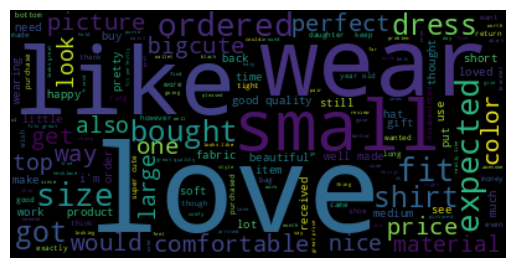

In [14]:
textt = " ".join(review for review in data.reviewText)
wordcloud = WordCloud(stopwords=stop_words).generate(textt)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [15]:
# update requent words for fashion data
stop_words.update([
  "ordered", 'bought', 'dress', 'order', 'color', 'shirt', 'one', 'tshirt', 'product',
  'item', 'would', 'could', 'make', 'fabric', 'jeans', 'sweater', 'jacket', 'pant', 'shoe', 'trouser', 
  'clothing', 'apparel', 'fashion''style', 'brand', 'collection', 'designer','season','trend','outfit',
  'accessory','runway','model','fabric','garment','store','shop','boutique','retail','customer','color'
  'size','material','design','look','dress','skirt','blouse','coat', 'accessory','jewelry','handbag','hat','scarf','sunglasses',
  'watch','makeup','hair','model','photography','influencer','marketing','promotion','sale','discount','price', 'wear', 'picture',
  'received', 'money', 'actually', 'almost', 'also', 'another',
       'arm', 'around', 'arrived', 'baby', 'back','bag', 'band', 'belt', 'bit', 'black', 'boot', 'bottom', 'came',
       'cant', 'come', 'costume', 'cover', 'cut', 'daughter', 'day', 'different', 'easy', 'enough', 'er', 'even',  'extra', 'find'
       'first', 'foot', 'gave', 'get', 'gift', 'give', 'glass',
       'go', 'going', 'got', 'head', 'however', 'husband', 'im', 'ive', 'keep', 'know', 'made', 'make', 'many', 'month',
       'overall', 'pair', 'pant', 'part', 'piece',
       'pocket', 'purchase', 'purchased', 'purse','put', 'review', 'ring', 'run', 'said', 'say', 'see', 'seems',
       'shipping', 'shoe', 'short', 'side', 'since', 'sleeve', 'sock', 'something', 'son', 'stay', 'still', 'strap', 'sun',
       'support', 'theyre', 'thing', 'time', 'took', 'tried', 'true', 'two', 'use', 'usually', 'wash',
       'way', 'week', 'white', 'without', 'woman', 'worn', 'xl', 'year'
])


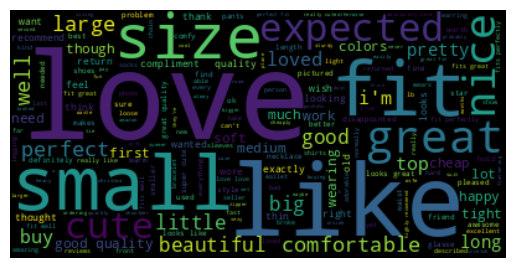

In [16]:
wordcloud = WordCloud(stopwords=stop_words).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Natural Language Processing

In [17]:
data.head(10)

,overall,verified,reviewTime,reviewText,summary,length
0,2,True,2014-09-28,"i agree with the other review, the opening is ...","I agree with the other review, the opening is ...",48
1,2,True,2014-08-24,too tiny an opening,Two Stars,4
2,4,True,2014-05-31,these little plastic backs work great. no mor...,Works great!,28
3,3,True,2013-09-22,mother - in - law wanted it as a present for h...,bought as a present,21
4,3,True,2013-07-17,"item is of good quality. looks great, too. but...",Buxton heiress collection,68
5,4,True,2013-03-09,this brand has been around a long time and you...,BUXTON QUALITY!,26
6,2,True,2013-01-27,i smoke 's and these are not made for them. i...,Buxton Heiress Collection Black Leather Cigare...,26
7,1,True,2013-01-04,"cheap and cheesy, but i guess i could have exp...",inexpensive case,20
8,1,True,2012-07-30,"i ordered a ladies cigarette case for my wife,...",i was ripped off!!!!,58
9,3,True,2017-10-31,love it but it tore up shortly after i got it....,Love it but it tore up shortly after I got ...,31


In [18]:
data[data.overall == 3]

,overall,verified,reviewTime,reviewText,summary,length
3,3,True,2013-09-22,mother - in - law wanted it as a present for h...,bought as a present,21
4,3,True,2013-07-17,"item is of good quality. looks great, too. but...",Buxton heiress collection,68
9,3,True,2017-10-31,love it but it tore up shortly after i got it....,Love it but it tore up shortly after I got ...,31
11,3,True,2017-10-07,it is smaller than what i was expecting. the z...,Three Stars,16
20,3,True,2017-04-26,nice but does not fit s,Three Stars,6
...,...,...,...,...,...,...
658162,3,True,2017-03-17,"small fit and a bit short but i'm '"" so everyt...",Three Stars,18
658164,3,True,2017-01-09,really cute dress. i bought a small and medium...,Really cute dress. I bought a small and medium...,60
658165,3,True,2016-11-29,ordered an xl\nfits like a m\nthe fabric is ad...,Runs very small,10
658181,3,True,2016-11-10,too big in the chest area!,Three Stars,6


In [19]:
# Add dummy sentiment column
data['sentiment'] = 0
data

,overall,verified,reviewTime,reviewText,summary,length,sentiment
0,2,True,2014-09-28,"i agree with the other review, the opening is ...","I agree with the other review, the opening is ...",48,0
1,2,True,2014-08-24,too tiny an opening,Two Stars,4,0
2,4,True,2014-05-31,these little plastic backs work great. no mor...,Works great!,28,0
3,3,True,2013-09-22,mother - in - law wanted it as a present for h...,bought as a present,21,0
4,3,True,2013-07-17,"item is of good quality. looks great, too. but...",Buxton heiress collection,68,0
...,...,...,...,...,...,...,...
658179,5,True,2017-02-21,i absolutely love this dress!! it's sexy and ...,I absolutely love this dress,48,0
658180,5,True,2016-11-25,i'm ' lbs. i'm on the tall side. i wear a larg...,I wear a large and ordered a large and it stil...,37,0
658181,3,True,2016-11-10,too big in the chest area!,Three Stars,6,0
658182,3,True,2016-11-10,"too clear in the back, needs lining",Three Stars,7,0


In [20]:
# Converting rating to Sentiment
data['sentiment'][data.overall > 3] = 1
data

<ipython-input-20-e5b4ee1d8a87>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sentiment'][data.overall > 3] = 1


,overall,verified,reviewTime,reviewText,summary,length,sentiment
0,2,True,2014-09-28,"i agree with the other review, the opening is ...","I agree with the other review, the opening is ...",48,0
1,2,True,2014-08-24,too tiny an opening,Two Stars,4,0
2,4,True,2014-05-31,these little plastic backs work great. no mor...,Works great!,28,1
3,3,True,2013-09-22,mother - in - law wanted it as a present for h...,bought as a present,21,0
4,3,True,2013-07-17,"item is of good quality. looks great, too. but...",Buxton heiress collection,68,0
...,...,...,...,...,...,...,...
658179,5,True,2017-02-21,i absolutely love this dress!! it's sexy and ...,I absolutely love this dress,48,1
658180,5,True,2016-11-25,i'm ' lbs. i'm on the tall side. i wear a larg...,I wear a large and ordered a large and it stil...,37,1
658181,3,True,2016-11-10,too big in the chest area!,Three Stars,6,0
658182,3,True,2016-11-10,"too clear in the back, needs lining",Three Stars,7,0


In [21]:
download('punkt')
download('stopwords')
download('wordnet')
download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [22]:
# Tokenization
data.reviewText = data.reviewText.apply(
    lambda sentence: word_tokenize(str(sentence))
)
data.head()

,overall,verified,reviewTime,reviewText,summary,length,sentiment
0,2,True,2014-09-28,"[i, agree, with, the, other, review, ,, the, o...","I agree with the other review, the opening is ...",48,0
1,2,True,2014-08-24,"[too, tiny, an, opening]",Two Stars,4,0
2,4,True,2014-05-31,"[these, little, plastic, backs, work, great, ....",Works great!,28,1
3,3,True,2013-09-22,"[mother, -, in, -, law, wanted, it, as, a, pre...",bought as a present,21,0
4,3,True,2013-07-17,"[item, is, of, good, quality, ., looks, great,...",Buxton heiress collection,68,0


In [23]:
data.head()['reviewText'][0]

['i',
 'agree',
 'with',
 'the',
 'other',
 'review',
 ',',
 'the',
 'opening',
 'is',
 'too',
 'small',
 '.',
 'i',
 'almost',
 'bent',
 'the',
 'hook',
 'on',
 'some',
 'very',
 'expensive',
 'earrings',
 'trying',
 'to',
 'get',
 'these',
 'up',
 'higher',
 'than',
 'just',
 'the',
 'end',
 'so',
 'they',
 "'re",
 'not',
 'seen',
 '.',
 'would',
 'not',
 'buy',
 'again',
 'but',
 'for',
 'the',
 'price',
 ',',
 'not',
 'sending',
 'back',
 '.']

In [24]:
# Remove Stop Words

data['reviewText'] = data.reviewText.apply(
    lambda tokens: [token for token in tokens if token.casefold() not in stop_words]
)

In [25]:
data.head()

,overall,verified,reviewTime,reviewText,summary,length,sentiment
0,2,True,2014-09-28,"[agree, ,, opening, small, ., bent, hook, expe...","I agree with the other review, the opening is ...",48,0
1,2,True,2014-08-24,"[tiny, opening]",Two Stars,4,0
2,4,True,2014-05-31,"[little, plastic, backs, work, great, ., loosi...",Works great!,28,1
3,3,True,2013-09-22,"[mother, -, -, law, wanted, present, sister, ....",bought as a present,21,0
4,3,True,2013-07-17,"[good, quality, ., looks, great, ,, ., fit, 's...",Buxton heiress collection,68,0


In [26]:
data.head()['reviewText'][0]

['agree',
 ',',
 'opening',
 'small',
 '.',
 'bent',
 'hook',
 'expensive',
 'earrings',
 'trying',
 'higher',
 'end',
 "'re",
 'seen',
 '.',
 'buy',
 ',',
 'sending',
 '.']

In [27]:
# Lemmatization to compact in 

lemmatizer = WordNetLemmatizer()
data['reviewText'] = data.reviewText.apply(
    lambda tokens: [lemmatizer.lemmatize(token) for token in tokens]
)

In [28]:
data.head()

,overall,verified,reviewTime,reviewText,summary,length,sentiment
0,2,True,2014-09-28,"[agree, ,, opening, small, ., bent, hook, expe...","I agree with the other review, the opening is ...",48,0
1,2,True,2014-08-24,"[tiny, opening]",Two Stars,4,0
2,4,True,2014-05-31,"[little, plastic, back, work, great, ., loosin...",Works great!,28,1
3,3,True,2013-09-22,"[mother, -, -, law, wanted, present, sister, ....",bought as a present,21,0
4,3,True,2013-07-17,"[good, quality, ., look, great, ,, ., fit, 's,...",Buxton heiress collection,68,0


In [29]:
data.head()['reviewText'][0]

['agree',
 ',',
 'opening',
 'small',
 '.',
 'bent',
 'hook',
 'expensive',
 'earring',
 'trying',
 'higher',
 'end',
 "'re",
 'seen',
 '.',
 'buy',
 ',',
 'sending',
 '.']

In [30]:
# join tokens
data['reviewText'] = data.reviewText.apply(
    lambda tokens: ' '.join(tokens)
)

In [31]:
data.head()

,overall,verified,reviewTime,reviewText,summary,length,sentiment
0,2,True,2014-09-28,"agree , opening small . bent hook expensive ea...","I agree with the other review, the opening is ...",48,0
1,2,True,2014-08-24,tiny opening,Two Stars,4,0
2,4,True,2014-05-31,little plastic back work great . loosing `` ho...,Works great!,28,1
3,3,True,2013-09-22,mother - - law wanted present sister . liked w...,bought as a present,21,0
4,3,True,2013-07-17,"good quality . look great , . fit 's ! stretch...",Buxton heiress collection,68,0


In [32]:
data.sentiment.value_counts()

1    445028
0    213156
Name: sentiment, dtype: int64

# Exploring wordcloud for each sentiment

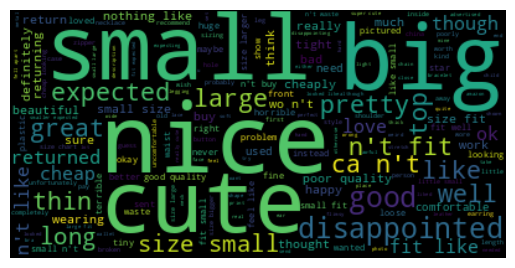

In [33]:
# WordCloud for Negetive Sentiment
textt = " ".join(review for review in data.loc[data['sentiment']==0, 'reviewText'])
wordcloud = WordCloud(stopwords=stop_words).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [48]:
# remove positive words from Negetive Sentiment
def remove_positive_words(row: str) -> str:
  return str(row).replace('great', '').replace('good', '').replace('pretty', '').replace('beautiful', '')\
  .replace('comfortable', '').replace('love', '').replace('better', '').replace('nice', '').replace('fit', '')\
  .replace('also', '').replace('quality', '').replace('cute', '').replace('way', '').replace('top', '').\
  replace('well', '').replace('like', '').replace('expected', '').replace('perfect', '').replace('happy', '')

data.loc[data['sentiment']==0, 'reviewText'] = data.loc[data['sentiment']==0, 'reviewText'].apply(
    remove_positive_words
)

In [49]:
data.loc[data['sentiment']==0, 'reviewText']

0         agree  opening small  bent hook expensive earr...
1                                              tiny opening
3               mother   law wanted present sister  d work 
4            look     s  stretched  carefully push case ...
6             smoke s  cigarette wo nt close  disappointed 
                                ...                        
658164    really   small medium return nt close front ch...
658165                                     adorable though 
658171                                                sheer
658181                                      big chest area 
658182                                   clear  need lining
Name: reviewText, Length: 213156, dtype: object

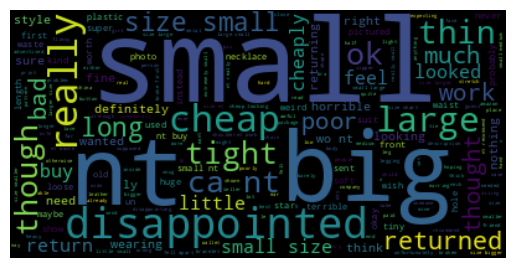

In [50]:
textt = " ".join(review for review in data[data['sentiment']==0]['reviewText'])
wordcloud = WordCloud(stopwords=stop_words).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

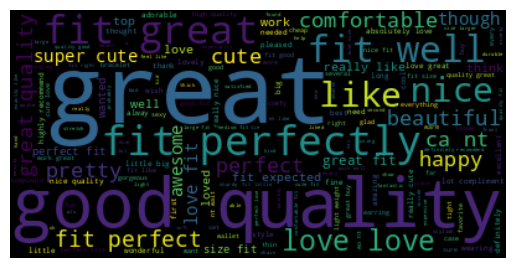

In [51]:
# WordCloud for Positive Sentiment
textt = " ".join(review for review in data[data['sentiment']==1]['reviewText'])
wordcloud = WordCloud(stopwords=stop_words).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [38]:
data.loc[data['sentiment']==1, 'reviewText']

2         little plastic back work great . loosing `` ho...
5         long count good quality merchandise . held wel...
10                                     love looking thank !
13        wonderful . several . last forever unless lose...
14        love ! think six seven case buxton . stylish ,...
                                ...                        
658177    beautifull person photo 'm lb bougth size l bi...
658178                 love love love iam ' large beautiful
658179    absolutely love ! ! 's sexy comfortable . spli...
658180    'm ' lb . 'm tall . large large comfortable am...
658183    slightly small . worked company graciously sen...
Name: reviewText, Length: 445028, dtype: object

In [53]:
# remove unnecessary negetive words from Positive Sentiment
def remove_negetive_words(row: str) -> str:
  return row.replace('bad', '').replace('used', '').replace('however', '').replace('old', '')\
  .replace('problem', '').replace('made', '').replace('necklace', '').replace('short', '')\
  .replace('small', '').replace('looking', '').replace('poor', '')


data.loc[data['sentiment']==1, 'reviewText'] = data.loc[data['sentiment']==1, 'reviewText'].apply(
    remove_negetive_words
)

In [54]:
data.loc[data['sentiment']==1, 'reviewText']

2         little plastic back work great  loosing  hook ...
5         long count good quality merchandise  held well...
10                                             love  thank 
13        wonderful  several  last forever unless lose  ...
14        love  think six seven case buxton  stylish  du...
                                ...                        
658177    beautifull person photo m lb bougth size l big...
658178                  love love love iam  large beautiful
658179    absolutely love   s sexy comfortable  split mu...
658180    m  lb  m tall  large large comfortable amount ...
658183    slightly   worked company graciously sending b...
Name: reviewText, Length: 445028, dtype: object

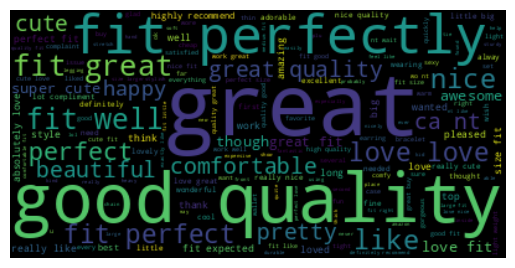

In [55]:
textt = " ".join(review for review in data.loc[data['sentiment']==1, 'reviewText'])
wordcloud = WordCloud(stopwords=stop_words).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [56]:
data

,overall,verified,reviewTime,reviewText,summary,length,sentiment
0,2,True,2014-09-28,agree opening small bent hook expensive earr...,"I agree with the other review, the opening is ...",48,0
1,2,True,2014-08-24,tiny opening,Two Stars,4,0
2,4,True,2014-05-31,little plastic back work great loosing hook ...,Works great!,28,1
3,3,True,2013-09-22,mother law wanted present sister d work,bought as a present,21,0
4,3,True,2013-07-17,look s stretched carefully push case ...,Buxton heiress collection,68,0
...,...,...,...,...,...,...,...
658179,5,True,2017-02-21,absolutely love s sexy comfortable split mu...,I absolutely love this dress,48,1
658180,5,True,2016-11-25,m lb m tall large large comfortable amount ...,I wear a large and ordered a large and it stil...,37,1
658181,3,True,2016-11-10,big chest area,Three Stars,6,0
658182,3,True,2016-11-10,clear need lining,Three Stars,7,0


# Save Data

In [57]:
data.head()['reviewText'][0]

'agree  opening small  bent hook expensive earring trying higher end re seen  buy  sending '

In [58]:
data.to_csv(
    '/content/drive/MyDrive/Colab Notebooks/amazon/FshionProductReviews_V5_NLP.csv', index=False
)